# Baseball Case Study

# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle #to save the data
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [409]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()#check first five rows from the dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


label is continous i.e 'W' 

# Data Analysis 

In [410]:
data.shape #to know the total count of the data

(30, 17)

In [411]:
data.columns #lets check all the columns both label and features 

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

There are 17 columns in which 16 are features['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'] and 1 is Label ['W']

In [412]:
data.info() #to know what kind of data it is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


As i mentioned before our label is continous i.e 'W'   int64 
and we can see there are 0 null values but still we will use alternative method to chek null values once again 

In [413]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

here we can see there are no null values present here 

In [414]:
data.describe() #lets describe the data 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We do not consider label values here i.e W 

we can see on;y CG column has the minimum value is 0 this is because ==>> 
CG – Complete game: number of games where player was the only pitcher for their team , and we can see few columns has very low value where as others have high value 

lets check relation between features and label response by using scatter plot 

- Ignore the first ROW First column as it is label vs label so obviously we gonna get a 90 degree straight line 

# VISUALIZE

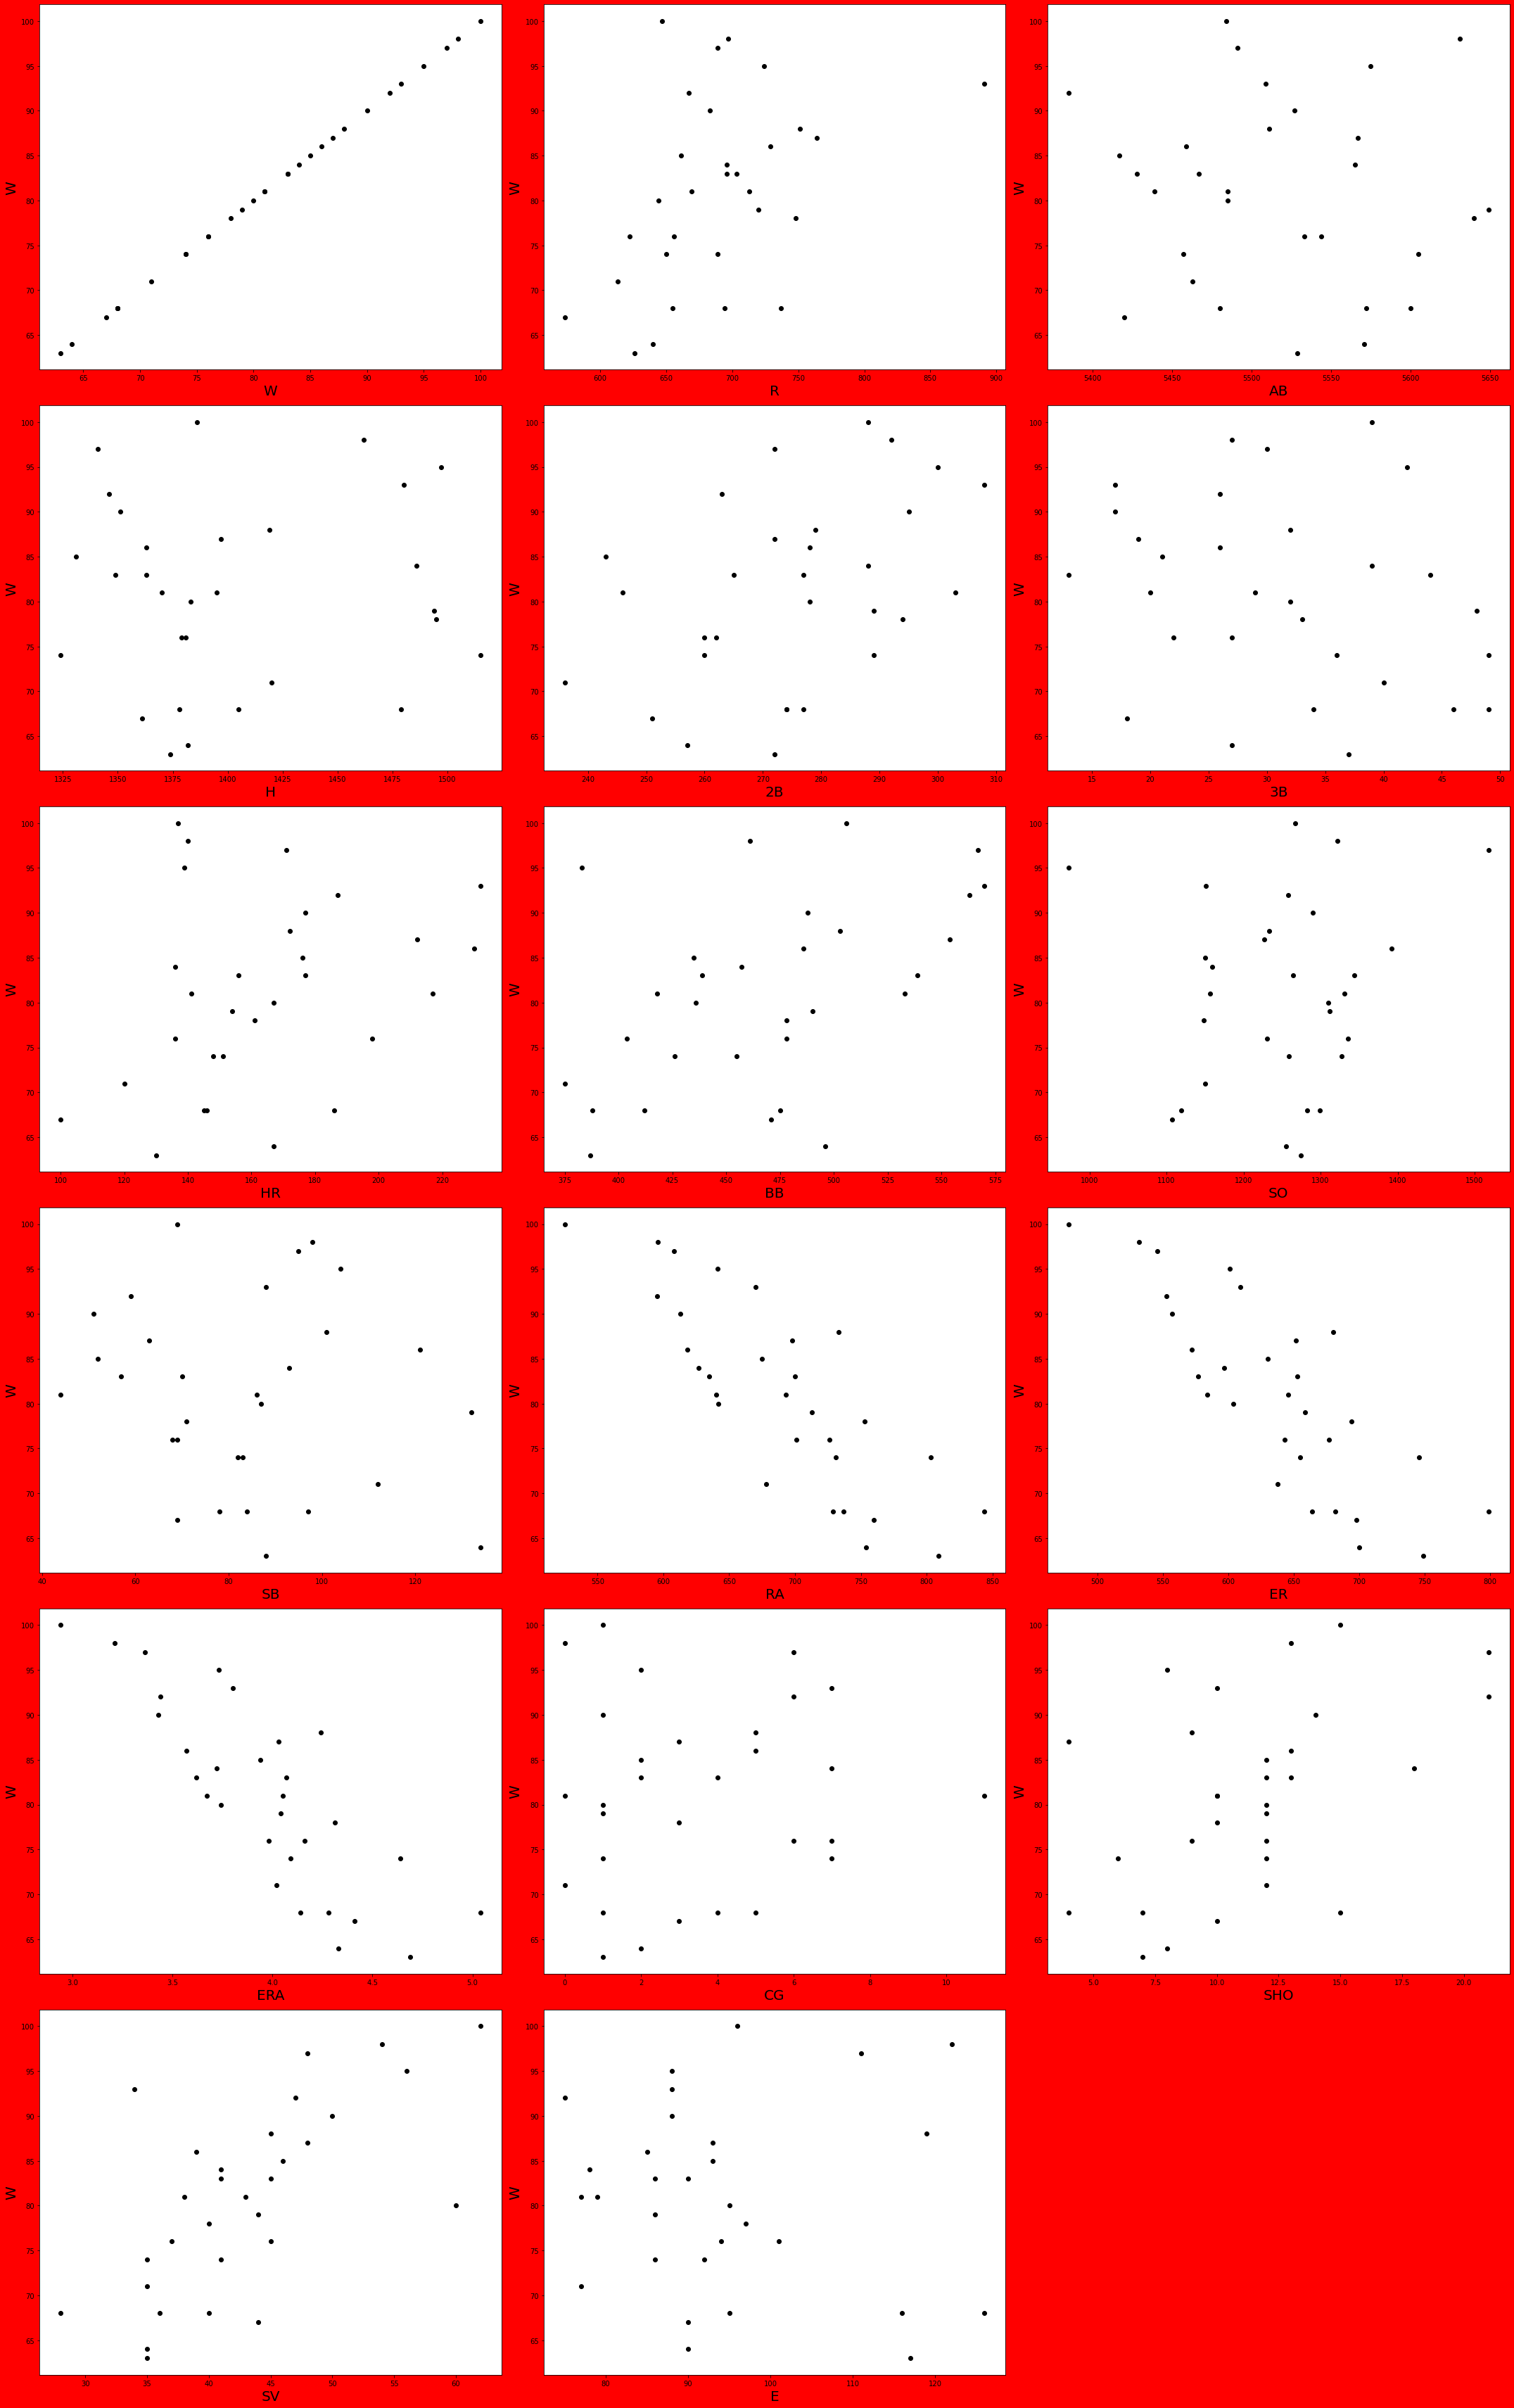

In [415]:
plt.figure(figsize = (30,55), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(7,3,plotnumber)
        plt.scatter(data[column],data['W'], color='black')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber += 1
plt.tight_layout()

we can see R,ERA and SV have good relation with W and others do have but not as much as  R,ERA and SV

lets plot regression plot so we can see the best FIT line to check weather our analysis for scatter plot is correct or not 

In [416]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<Figure size 720x1080 with 0 Axes>

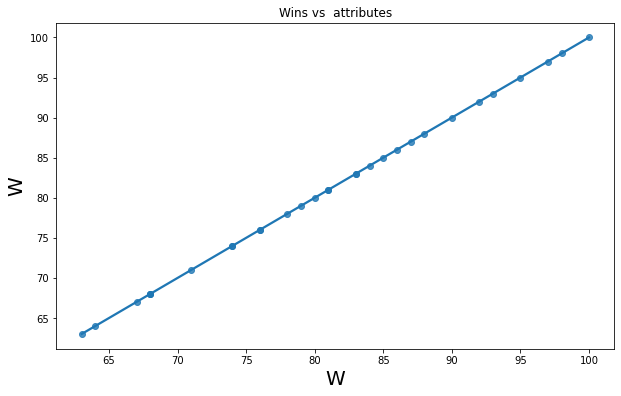

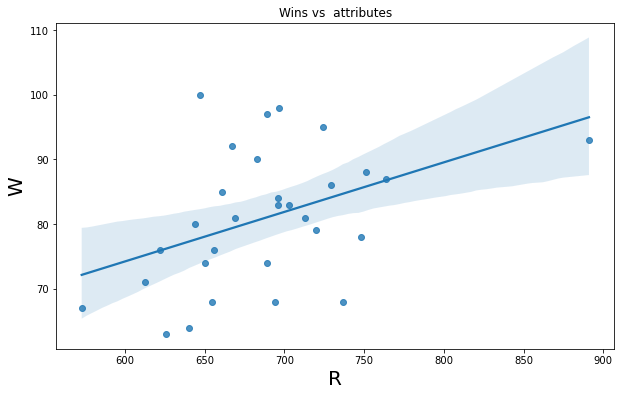

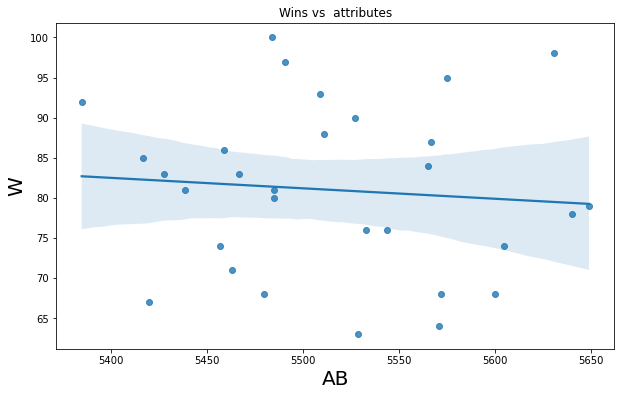

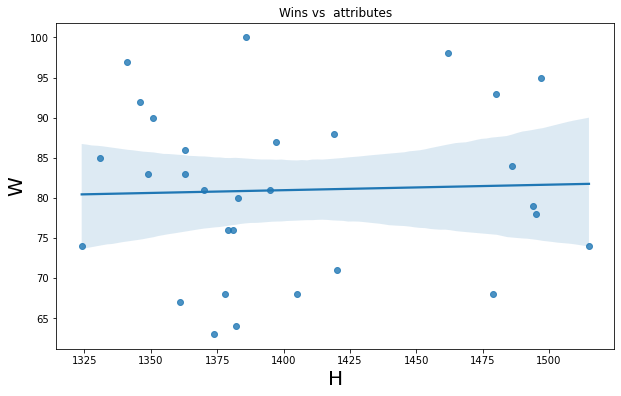

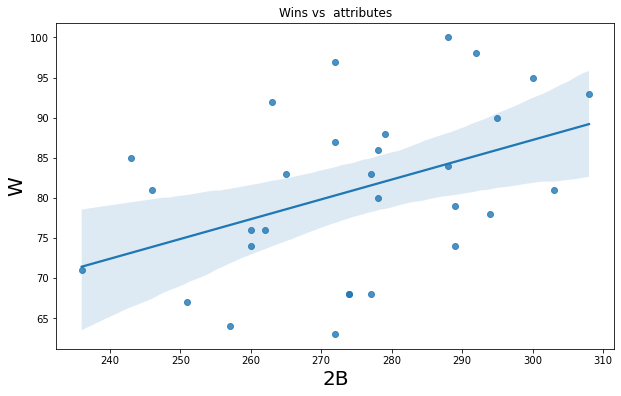

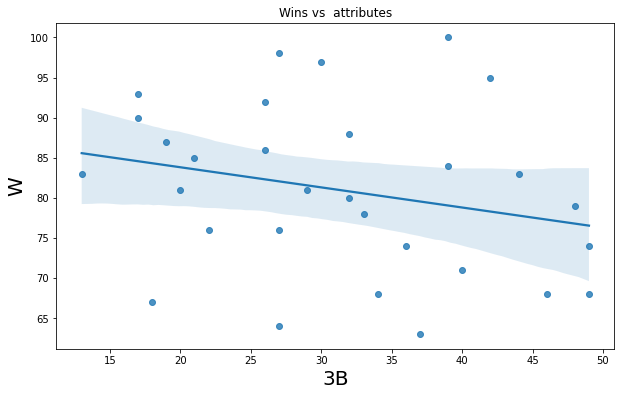

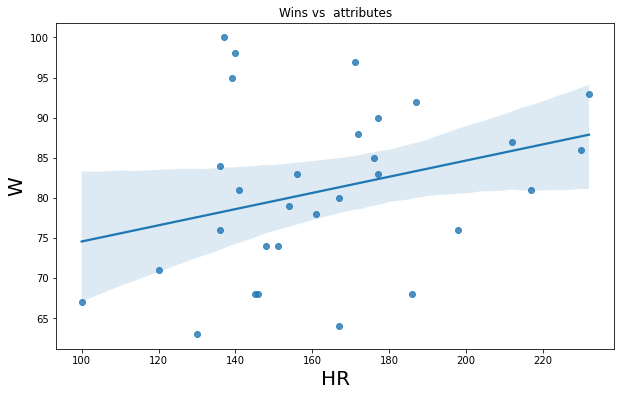

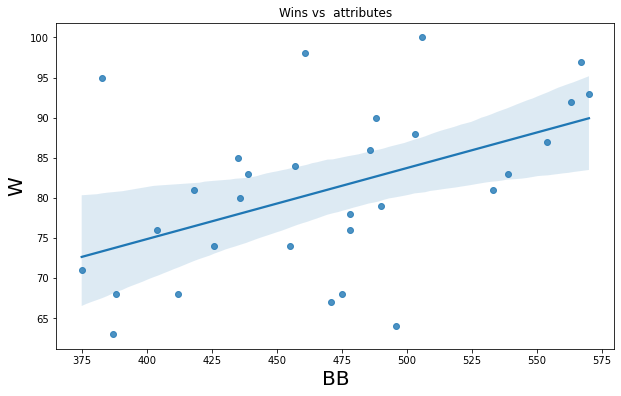

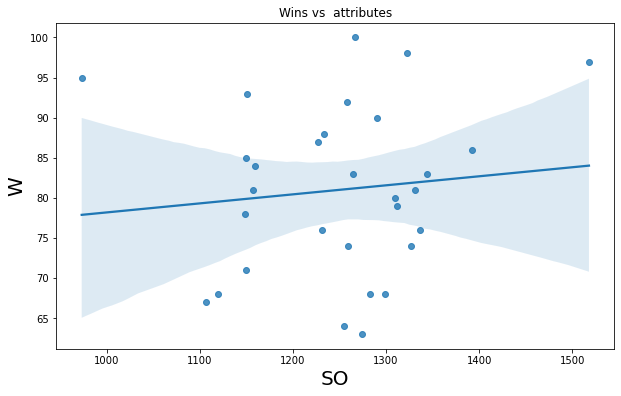

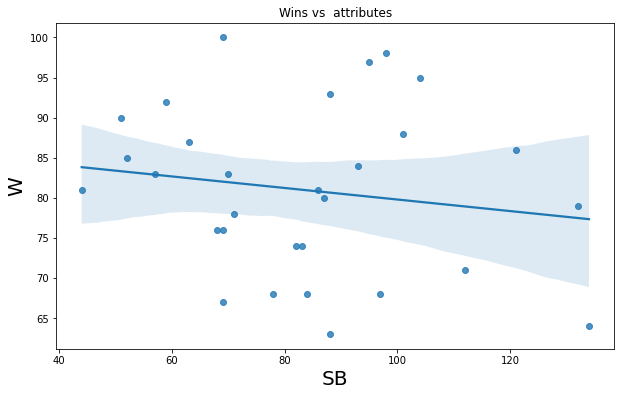

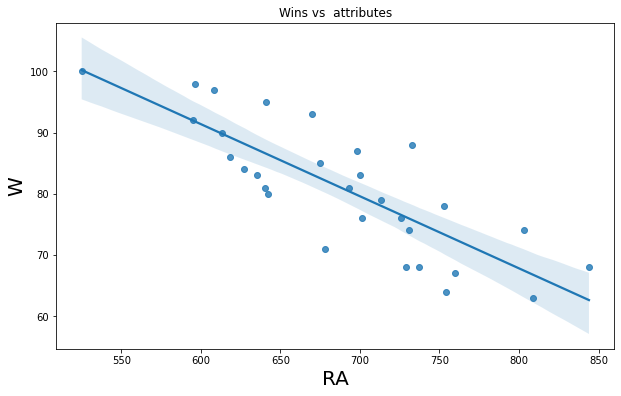

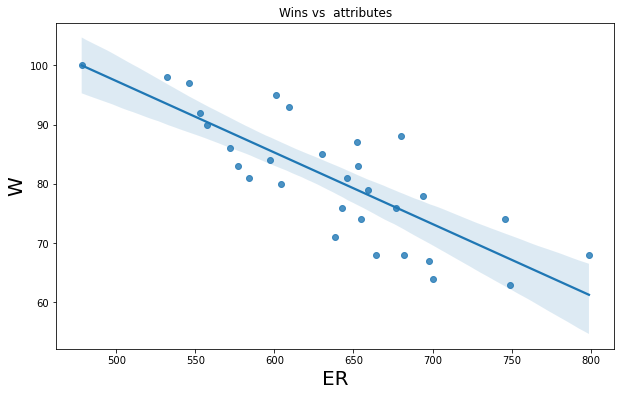

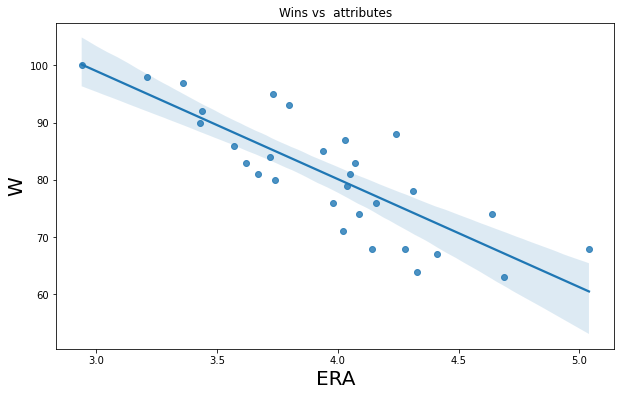

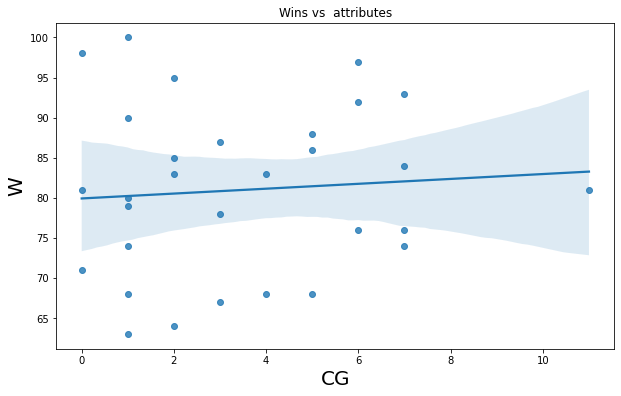

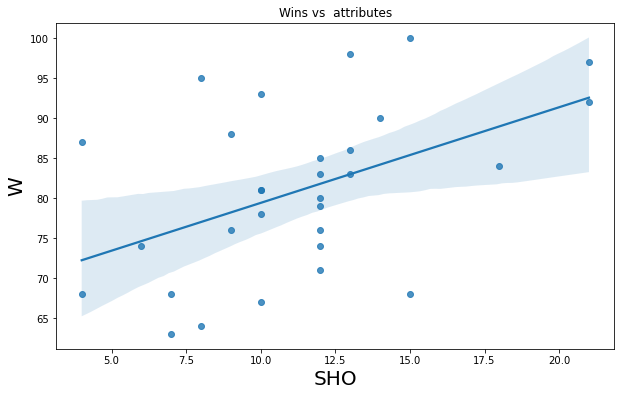

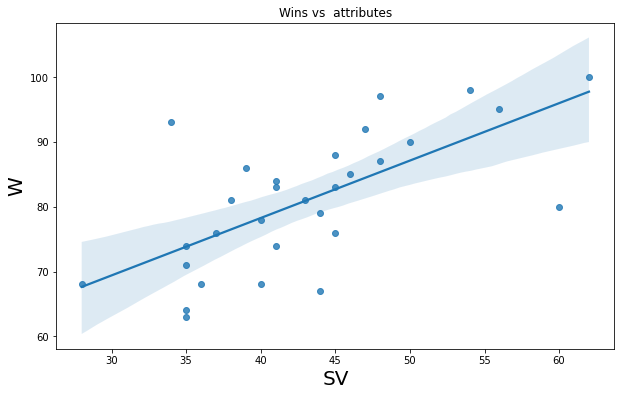

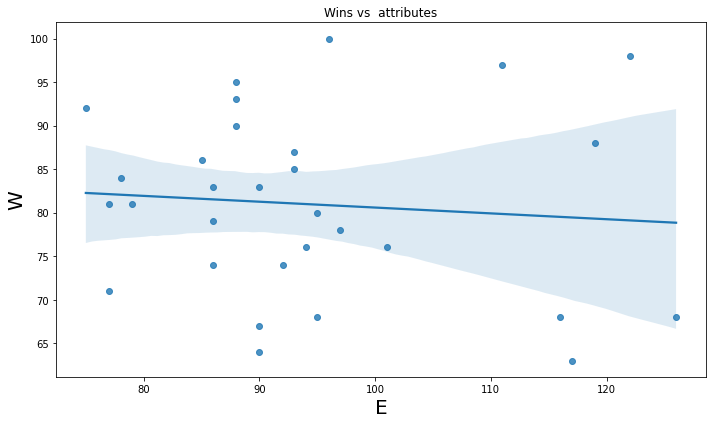

In [417]:
plt.figure(figsize = (10,15), facecolor = 'blue')
plotnumber = 1

for column in data:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(data[column], data['W'])
        plt.title('Wins vs  attributes')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=20)
        
plt.tight_layout()

RA(100-60), ER(100-60), ERA(100-58) has good relnship with Wins and they have the same value mostly , but others dont have such as them 

Lets check if all the columns are normally distributed or not by using distribution plot

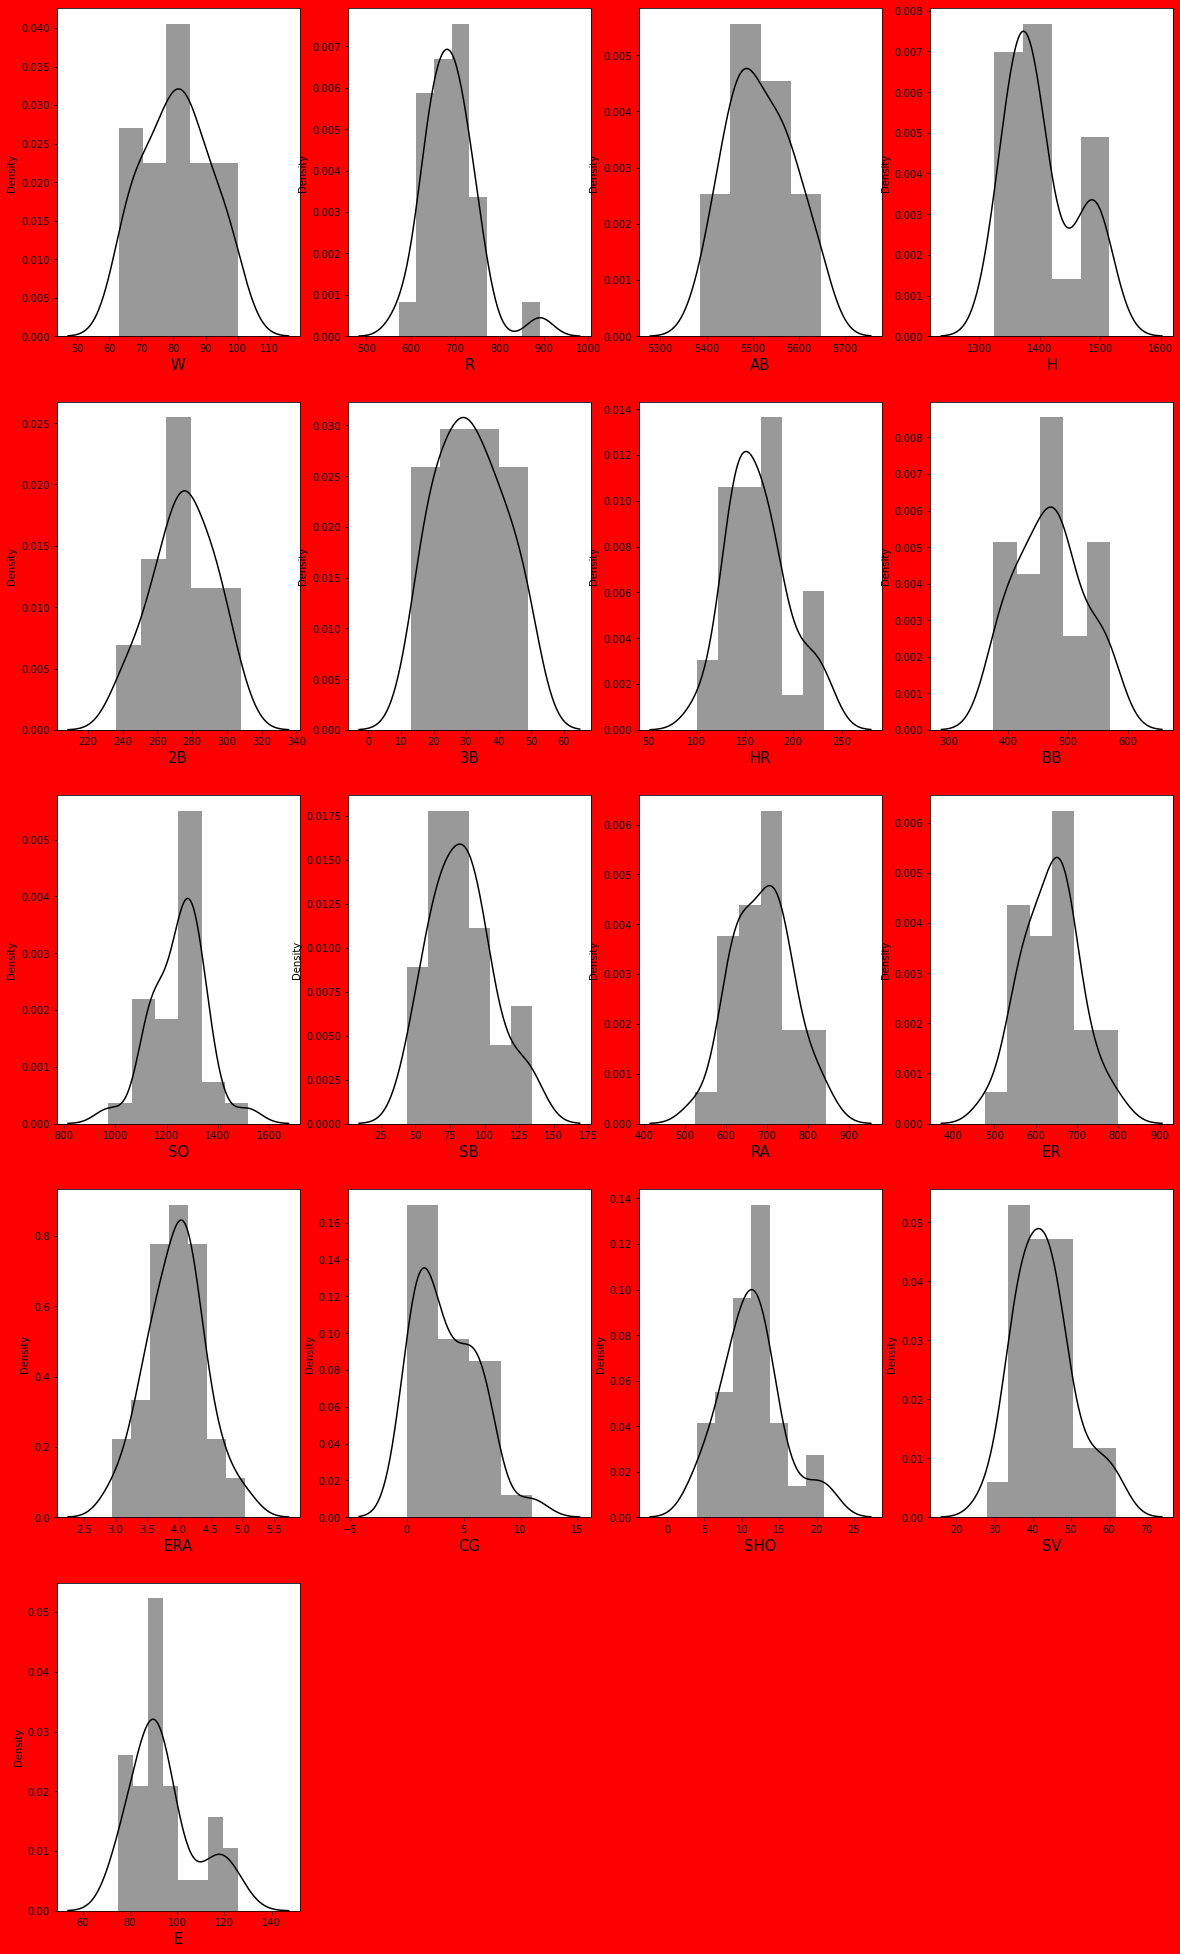

In [418]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

We can see most of the columns are normally distributed but some are not like E, R,SO ignore first row first column

Apply log transform
its primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. in this transform, we take the log of the values in a column and use these values as the column insted

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [ ]:
#finding the coreln bw the features
corr=data.corr()
print(corr.shape)
print('=====================corr================')
corr

lets check correlation using Heat MAP

In [469]:
#just find the corelation of features vs target using corrwith
data.drop('W',axis=1).corrwith(data.W)

R      0.390451
AB    -0.085780
H     -0.020787
2B     0.384886
3B    -0.206737
HR     0.245697
BB     0.447513
SO     0.156469
SB    -0.169503
RA    -0.823176
ER    -0.815308
ERA   -0.826952
CG     0.007696
SHO    0.481626
SV     0.756713
E     -0.079633
dtype: float64

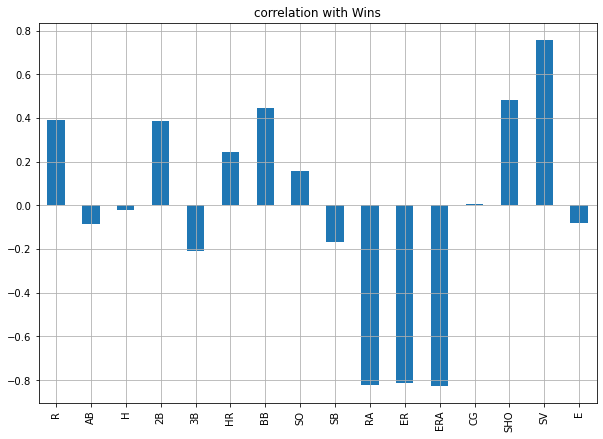

In [470]:
data.drop('W',axis=1).corrwith(data.W).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with Wins')
plt.show()

we can see RA,ER,ERA are highly correlated with each other lets check using heat map 

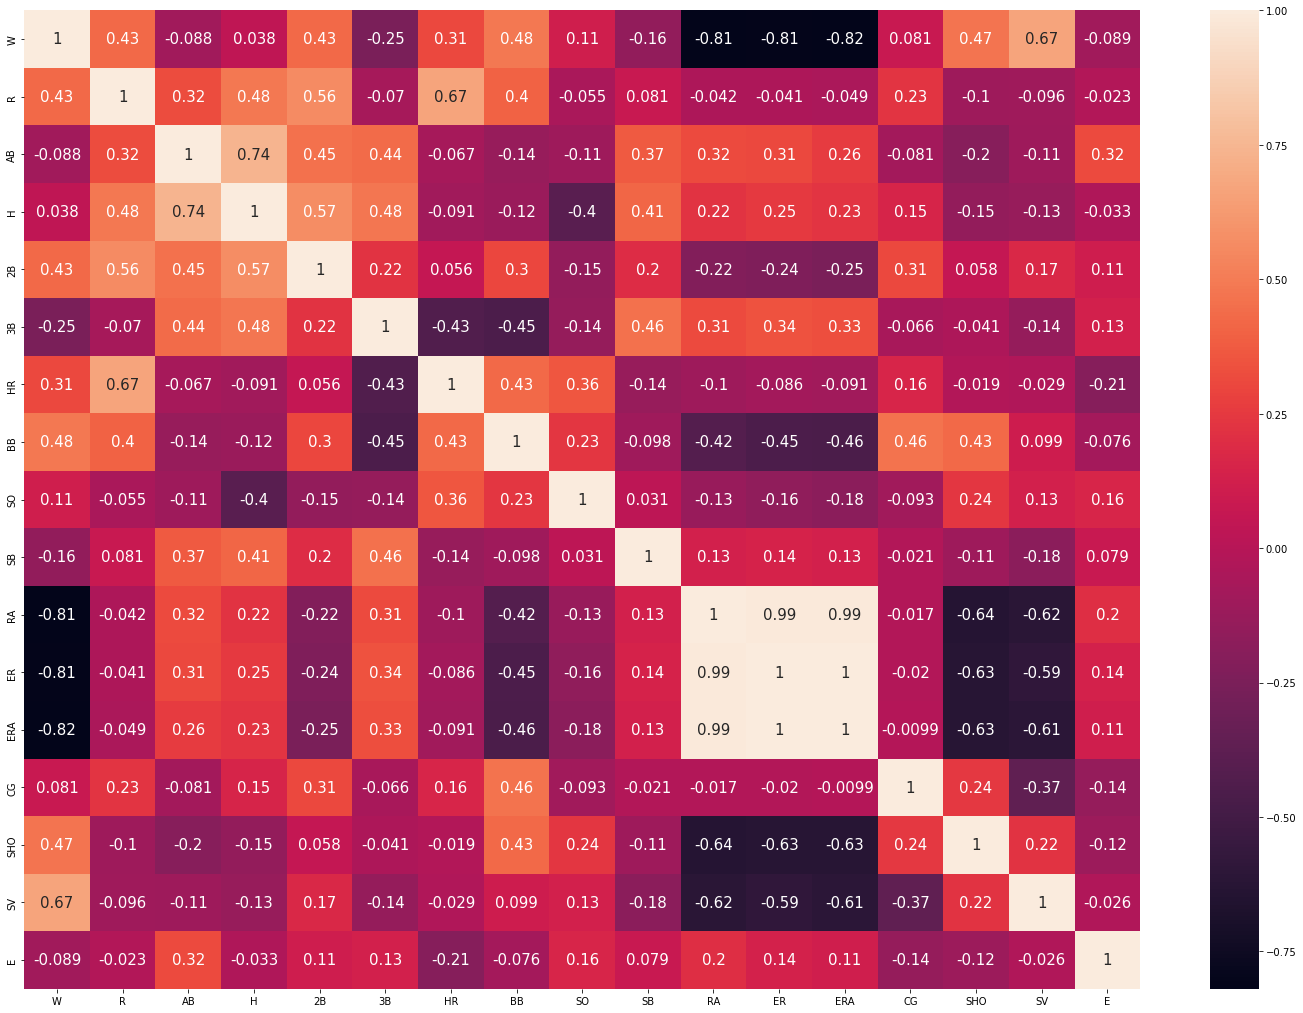

In [420]:
plt.figure(figsize = [25, 18])
sns.heatmap(data.corr(), annot = True,annot_kws={'size':15})
plt.show()



We can see that Feature ERA,ERand RA are highly corelated and we can see they are highly negative corelated , we gonna drop ER and RA  but we will keep ERA as it has same effect of winning i.e 0.82 , lets check individually using scattter plot , we will remove the features in data cleaning according to skewness as the data set is very small 

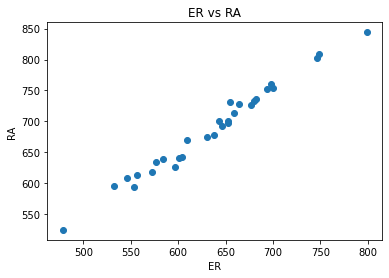

In [421]:
plt.scatter(data.ER,data.RA)
plt.xlabel('ER')
plt.ylabel('RA')
plt.title('ER vs RA')
plt.show()

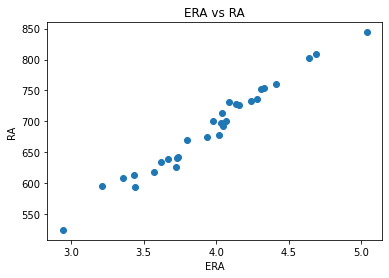

In [422]:
plt.scatter(data.ERA,data.RA)
plt.xlabel('ERA')
plt.ylabel('RA')
plt.title('ERA vs RA')
plt.show()

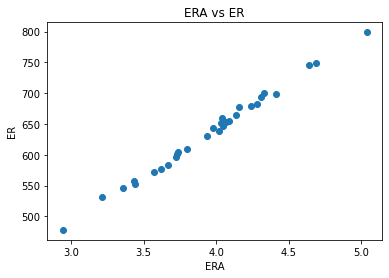

In [423]:
plt.scatter(data.ERA,data.ER)
plt.xlabel('ERA')
plt.ylabel('ER')
plt.title('ERA vs ER')
plt.show()

We can see that Feature ERA,ERand RA are highly corelated and we proved it using scatter plot by individual columns 

Lets check the outliers by using box plot

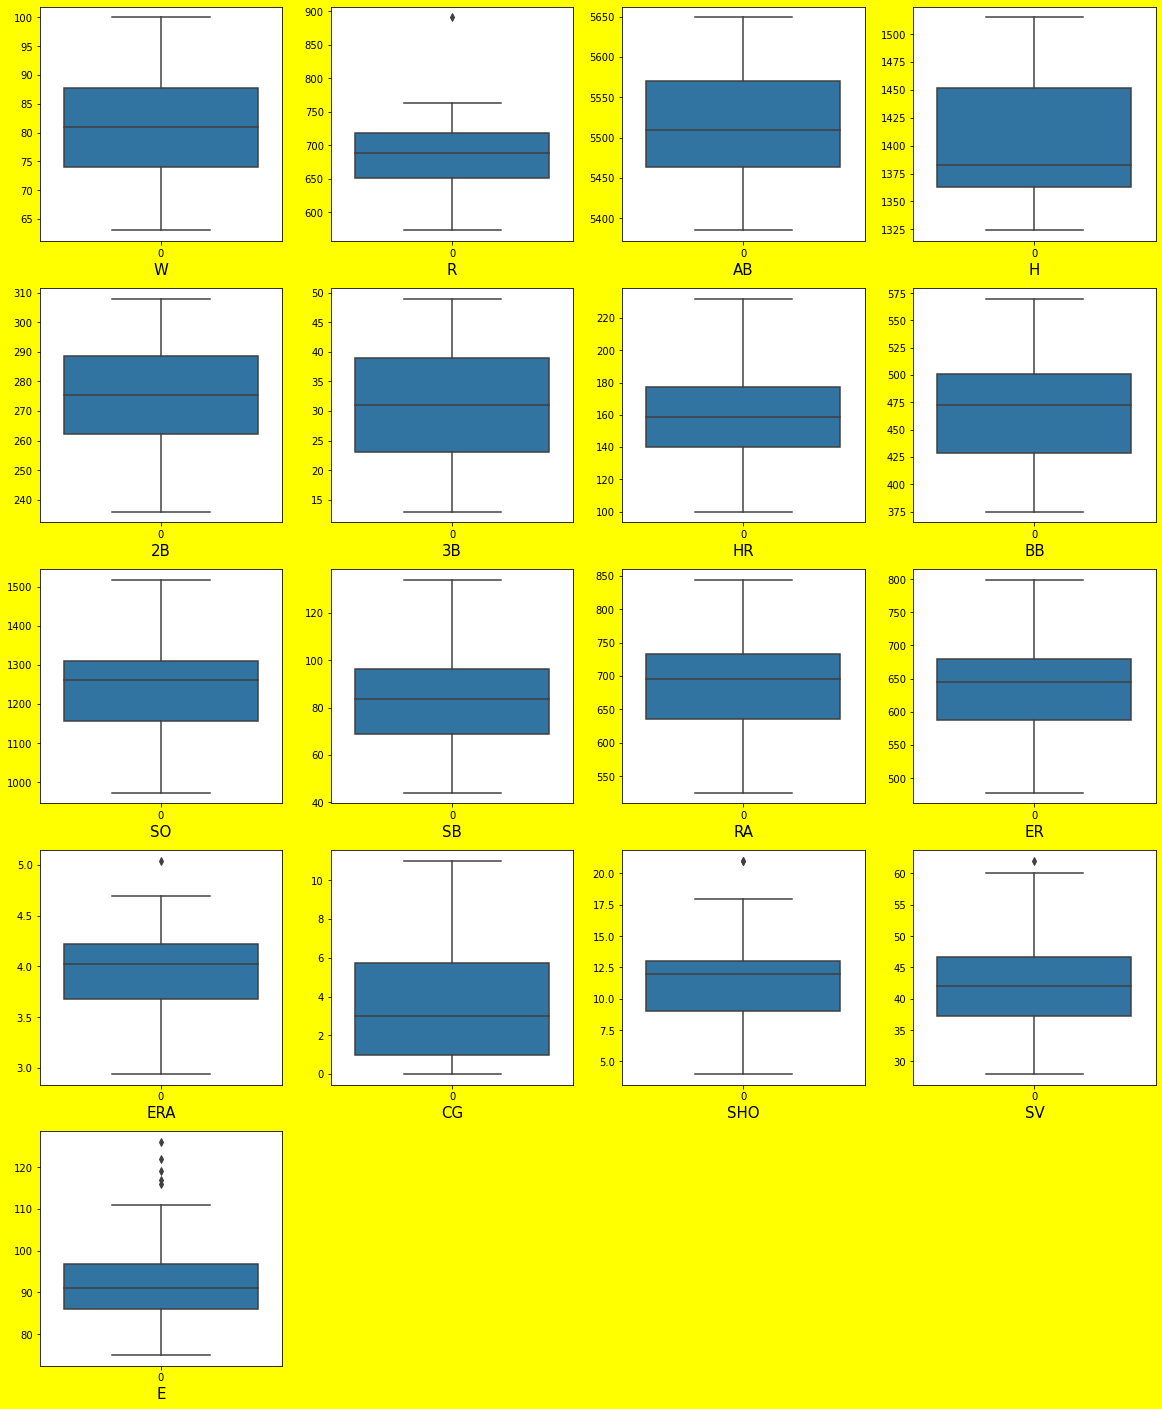

In [424]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1
for column in data:
    if graph<=17:
        plt.subplot(5,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()



we can see the outliers in columns R ,ERA,SHO,SV and E .here if we want we can remove outliers by using single feature but with that execution will loose more than half of the data so we will use Zscore method

# Cleaning the Data 

here we cant delete like we did for other columns as they data set is very Small

In [425]:
data.shape

(30, 17)

# Z Distrubution


1 standard deviation covers 99.7%

2 standard deviation covers 95.4%

3 standard deviation covers 68.3% (best SD)

In [426]:
from scipy.stats import zscore
z_score= zscore(data[['R','ERA','SHO','SV','E']])
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [427]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [428]:
data.shape

(29, 17)

So we lost 1 row which is less than 10 % as 3 rows qual to 10%

# Skewness Check 

In [432]:
#Checking for Skewness
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Skewness:
    lets check the skwenss and decrese it by using Power transformer method 

In [429]:
from sklearn.preprocessing import PowerTransformer

In [430]:
scaler=PowerTransformer(method='yeo-johnson')

In [433]:
data[['SHO','SV','CG','E']] = scaler.fit_transform(data[['SHO','SV','CG','E']].values)

#im not including H value here as i got value as 0 so we gonna use alternative method for that

In [434]:
data['H']=np.log(data['H'])

#we are not including H in Z-skwed method as we are getting value as 0 so we are performing here it self >


In [435]:
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

we can see there is lots of change in the data , low once again plt the distribution plot and lets see the skewness

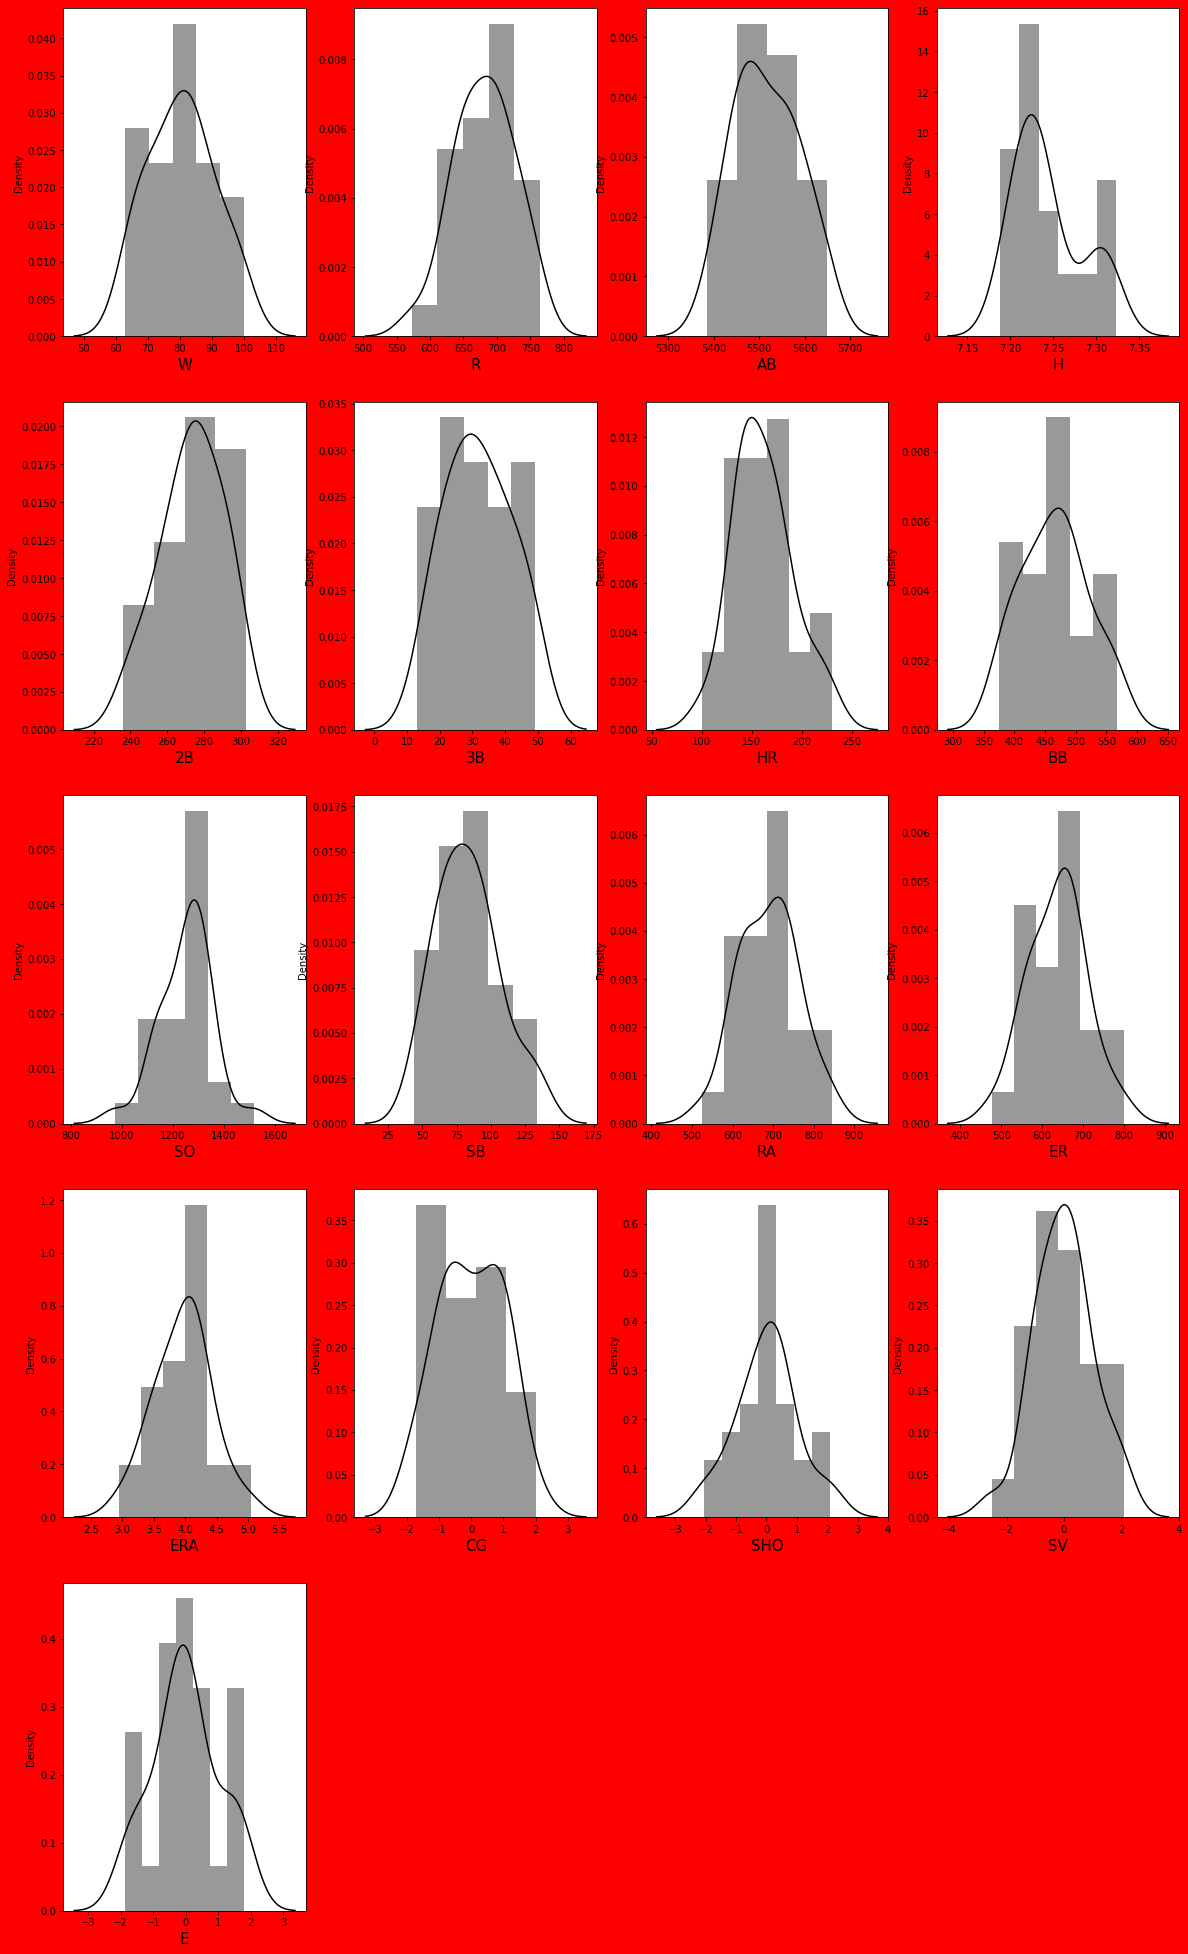

In [436]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [473]:
#Now lets drop sum of the colums according to VIF score as we cant delete as per heat that is because we will loose huge ammount of data as we got very less amount of data we have to work accordingly
x=data.drop(['W'],axis=1)
y=data['W']

# StandardScaler

In [474]:
scaler =StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Lets check VIF Score 

In [475]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,7.112303,R
1,20.237187,AB
2,10.114523,H
3,3.528059,2B
4,3.227810,3B
5,8.736958,HR
6,3.324537,BB
7,2.811547,SO
8,1.955252,SB
9,200.827312,RA


we will delete one by one even though we know they are many features which has score more than 10+ but still we will go one by one so that we can decrese other features score also .

we see ER and ERA  has highest VIF score amoung other so lets drop them and see if we get below 10 score for others 

In [480]:
X = X.drop(["ERA","ERA"],axis=1)

In [481]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.019372,R
1,5.210200,AB
2,7.727965,H
3,3.165732,2B
4,2.981242,3B
5,6.168587,HR
6,3.053348,BB
7,2.287736,SO
8,1.773120,SB
9,4.759215,RA


# Train and Test 

In [482]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)


# AdaBoostRegressor

In [487]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.9961484890874359
Test accuracy  -  0.7346998889784275


# LinearRegression

In [488]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=lr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.9659866359664915
Test accuracy  -  0.7843796630340814


# KNeighborsRegressor

In [489]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [490]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=knn.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.4730526600785161
Test accuracy  -  0.49872471047858247


# Lasso & Ridge regressor

In [491]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [492]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [493]:
alpha= lasscv.alpha_
alpha

0.13125467400249294

In [494]:
#know the bets paramater 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.13125467400249294)

In [495]:
lasso_reg.score(x_test,y_test)

0.7841155221912408

In [496]:
#RidgeCV will return best alpha and coefficient after performing 10 cross validation
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize =True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [497]:
ridgecv.alpha_

0.09099999999999998

In [498]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [499]:
ridge_model.score(x_test,y_test)

0.7851676732731409

# Hyper Tunning 

In [512]:
from sklearn.model_selection import RandomizedSearchCV

In [513]:
params={'alpha': [0.1, 1.0, 10.0],'fit_intercept': ['bool'],'max_iter': [100, 1000],'tol': [0, 200]}

In [517]:
rnd_srch=RandomizedSearchCV(Ridge(),cv=5,param_distributions=params)

In [518]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0],
                                        'fit_intercept': ['bool'],
                                        'max_iter': [100, 1000],
                                        'tol': [0, 200]})

In [519]:
rnd_srch.best_estimator_

Ridge(fit_intercept='bool', max_iter=100, tol=0)

In [520]:
ridge_model=Ridge(fit_intercept='bool', max_iter=100, tol=0)
ridge_model.fit(x_train,y_train)

Lasso(fit_intercept='bool', max_iter=100, tol=0)

In [525]:
pred=ridge_model.predict(x_test)

In [526]:
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 78.51676732731408


lets try to make changes f we can get better score 

In [554]:
ridge_model=Ridge(alpha= 0.1,fit_intercept='bool', max_iter=100, tol=1) #ok ,so after multiple changes tol has no effect even though its 200
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1, fit_intercept='bool', max_iter=100, tol=1)

In [555]:
pred=ridge_model.predict(x_test)

In [556]:
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 78.52113418850513


# After Tunning the score is 78.52% 

# saving the model  pickle

In [580]:
pickle.dump(ridge_model,open('BaseBall_model.pickle','wb'))

In [581]:
loaded_model=pickle.load(open('BaseBall_model.pickle','rb'))

# COMPLETED